In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls
/kaggle/input/GiveMeSomeCredit/cs-training.csv
/kaggle/input/GiveMeSomeCredit/sampleEntry.csv
/kaggle/input/GiveMeSomeCredit/cs-test.csv


In [2]:
train = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-training.csv')
test = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-test.csv')

In [3]:
display(train, test)
all_data = pd.concat([train, test])
# Test set NAN값이 있으니까 정답 컬럼 drop해야 함 
# 결측치 처리 

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [4]:
all_data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0.0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0.0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0.0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [5]:
display(all_data.info(), all_data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            251503 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  float64
 2   RevolvingUtilizationOfUnsecuredLines  251503 non-null  float64
 3   age                                   251503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  251503 non-null  int64  
 5   DebtRatio                             251503 non-null  float64
 6   MonthlyIncome                         201669 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       251503 non-null  int64  
 8   NumberOfTimes90DaysLate               251503 non-null  int64  
 9   NumberRealEstateLoansOrLines          251503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  251503 non-null  int64  
 11  

None

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,251503.000000,150000.000000,251503.000000,251503.000000,251503.000000,251503.000000,2.016690e+05,251503.000000,251503.000000,251503.000000,251503.000000,244953.000000
mean,65214.153533,0.066840,5.750415,52.339694,0.434245,349.562468,6.744818e+03,8.453064,0.278370,1.016155,0.252466,0.761995
std,40078.948539,0.249746,229.633980,14.775120,4.335643,1884.792016,2.571761e+04,5.145194,4.312539,1.121935,4.299204,1.123905
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31438.500000,0.000000,0.029977,41.000000,0.000000,0.174330,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,62876.000000,0.000000,0.153575,52.000000,0.000000,0.365612,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,94314.000000,0.000000,0.561293,63.000000,0.000000,0.861754,8.212000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,7.727000e+06,85.000000,98.000000,54.000000,98.000000,43.000000


* # Oversampling 문제 생기겠다 !

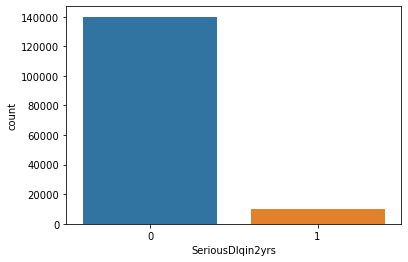

In [6]:
#plt.hist(train['SeriousDlqin2yrs']) 

import seaborn as sns
sns.countplot(train['SeriousDlqin2yrs'])



#Question: 0이랑 1만 보이게 하려면???


* # 결측치 어떻게 채울지 생각하기

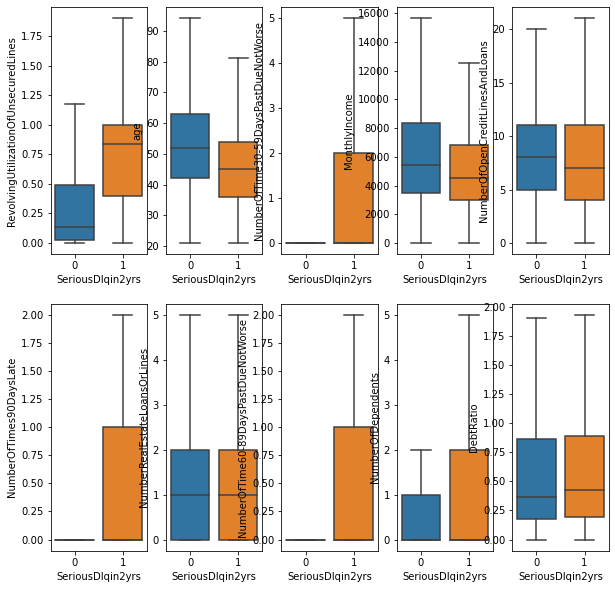

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

a, b = plt.subplots(2, 5, figsize=(10,10))
sns.boxplot(train['SeriousDlqin2yrs'], train['RevolvingUtilizationOfUnsecuredLines'], ax=b[0,0], showfliers=False)
sns.boxplot(train['SeriousDlqin2yrs'], train['age'], ax=b[0,1], showfliers=False)
sns.boxplot(train['SeriousDlqin2yrs'], train['NumberOfTime30-59DaysPastDueNotWorse'], ax=b[0,2], showfliers=False)
sns.boxplot(train['SeriousDlqin2yrs'], train['MonthlyIncome'], ax=b[0,3], showfliers=False)
sns.boxplot(train['SeriousDlqin2yrs'], train['NumberOfOpenCreditLinesAndLoans'], ax=b[0,4], showfliers=False)
sns.boxplot(train['SeriousDlqin2yrs'], train['NumberOfTimes90DaysLate'], ax=b[1,0], showfliers=False)
sns.boxplot(train['SeriousDlqin2yrs'], train['NumberRealEstateLoansOrLines'], ax=b[1,1], showfliers=False)
sns.boxplot(train['SeriousDlqin2yrs'], train['NumberOfTime60-89DaysPastDueNotWorse'], ax=b[1,2], showfliers=False)
sns.boxplot(train['SeriousDlqin2yrs'], train['NumberOfDependents'], ax=b[1,3], showfliers=False)
sns.boxplot(train['SeriousDlqin2yrs'], train['DebtRatio'], ax=b[1,4], showfliers=False)


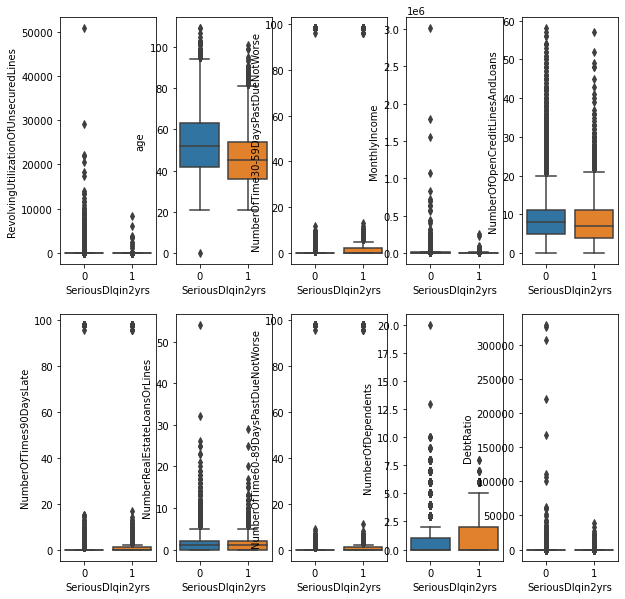

In [8]:
a, b = plt.subplots(2, 5, figsize=(10,10))
sns.boxplot(train['SeriousDlqin2yrs'], train['RevolvingUtilizationOfUnsecuredLines'], ax=b[0,0], showfliers=True)
sns.boxplot(train['SeriousDlqin2yrs'], train['age'], ax=b[0,1], showfliers=True)
sns.boxplot(train['SeriousDlqin2yrs'], train['NumberOfTime30-59DaysPastDueNotWorse'], ax=b[0,2], showfliers=True)
sns.boxplot(train['SeriousDlqin2yrs'], train['MonthlyIncome'], ax=b[0,3], showfliers=True)
sns.boxplot(train['SeriousDlqin2yrs'], train['NumberOfOpenCreditLinesAndLoans'], ax=b[0,4], showfliers=True)
sns.boxplot(train['SeriousDlqin2yrs'], train['NumberOfTimes90DaysLate'], ax=b[1,0], showfliers=True)
sns.boxplot(train['SeriousDlqin2yrs'], train['NumberRealEstateLoansOrLines'], ax=b[1,1], showfliers=True)
sns.boxplot(train['SeriousDlqin2yrs'], train['NumberOfTime60-89DaysPastDueNotWorse'], ax=b[1,2], showfliers=True)
sns.boxplot(train['SeriousDlqin2yrs'], train['NumberOfDependents'], ax=b[1,3], showfliers=True)
sns.boxplot(train['SeriousDlqin2yrs'], train['DebtRatio'], ax=b[1,4], showfliers=True)

In [9]:
all_data.isnull().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            49834
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        6550
dtype: int64

In [10]:
train.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

# Monthly Income(Real), Number of Dependents(Integer) -> 둘 다 numerical

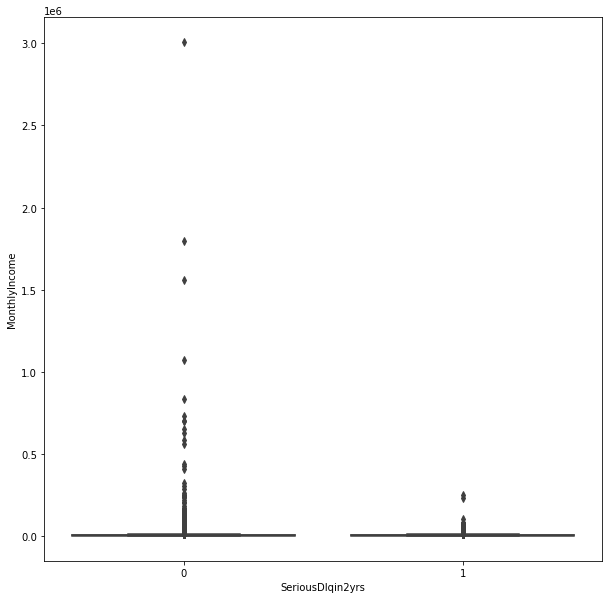

In [11]:
plt.subplots( figsize=(10,10))
sns.boxplot(train['SeriousDlqin2yrs'], train['MonthlyIncome'])

In [12]:
display(train['MonthlyIncome'].mean(), train['MonthlyIncome'].median())

6670.221237392844

5400.0

## 1) Median 값으로 처리하기  : 0.84376

In [13]:
all_data['MonthlyIncome'].describe()

count    2.016690e+05
mean     6.744818e+03
std      2.571761e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.212000e+03
max      7.727000e+06
Name: MonthlyIncome, dtype: float64

In [14]:
#all_data['MonthlyIncome'] =  all_data['MonthlyIncome'].replace(np.NaN, all_data['MonthlyIncome'].median())
#Question: Replace는 다시 DataFrame에 안 넣어줘도 되나요? 넣어줘야 함 

In [15]:
all_data['MonthlyIncome'].isnull().sum()

49834

In [16]:
#all_data['NumberOfDependents'] =  all_data['NumberOfDependents'].replace(np.NaN, all_data['NumberOfDependents'].median())

In [17]:
all_data['NumberOfDependents'].isnull().sum()

6550

In [18]:
all_data.isnull().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            49834
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        6550
dtype: int64

## 2.Mean으로 처리하기: 0.85925

In [19]:
#all_data['MonthlyIncome'] =  all_data['MonthlyIncome'].replace(np.NaN, all_data['MonthlyIncome'].mean())
#all_data['NumberOfDependents'] =  all_data['NumberOfDependents'].replace(np.NaN, all_data['NumberOfDependents'].mean())

## 3. Depentant만 Mode값으로 처리하기: 0.84451

In [20]:
all_data['NumberOfDependents'].mode()[0] #가장많은 순서대로 정렬하는 것 

0.0

In [21]:
count = pd.DataFrame(all_data['NumberOfDependents'].value_counts())
count

,NumberOfDependents
0.0,145520
1.0,43934
2.0,32820
3.0,16106
4.0,4857
5.0,1272
6.0,283
7.0,101
8.0,40
9.0,8


(-1.0, 6.0)

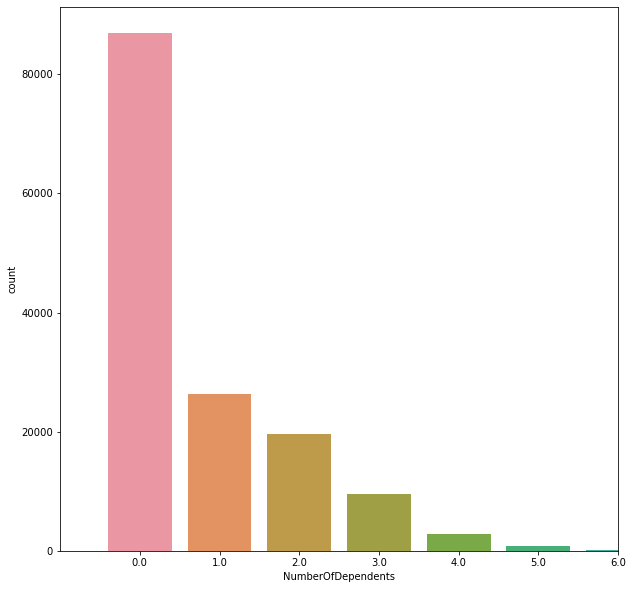

In [22]:
plt.subplots(figsize=(10,10))
#plt.bar(list(range(len(count))),count['NumberOfDependents'], align='center')
#Seaborn이용해서 하면 됨 (Countplot)
sns.countplot(train['NumberOfDependents'])
plt.xlim(-1,6)

In [23]:
#Question: Mode로 하면 왜 안되지? 
all_data['MonthlyIncome'] =  all_data['MonthlyIncome'].replace(np.NaN, all_data['MonthlyIncome'].mean())
all_data['NumberOfDependents'] =  all_data['NumberOfDependents'].replace(np.NaN,0)

* # Training 

In [24]:
all_data2 = all_data
all_data2 = all_data2.drop(columns=['SeriousDlqin2yrs'])

In [25]:
#Random_state 고정해주면 모델 바껴도 계속 이 전 모델 사용?? 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(all_data2[:len(train)],all_data[:len(train)]['SeriousDlqin2yrs'])
prob = rf.predict_proba(all_data2[len(train):])

#Question: 얼마나 진행됐는지 보여주는 바 그리는 방법

In [26]:
prob = pd.DataFrame(prob)
prob = prob[:][1]
#prob = prob.to_numpy()

prob

0         0.03
1         0.12
2         0.07
3         0.19
4         0.39
          ... 
101498    0.03
101499    0.46
101500    0.00
101501    0.13
101502    0.03
Name: 1, Length: 101503, dtype: float64

In [27]:
#all_data[:len(train)]['SeriousDlqin2yrs'].isnull().sum()

In [28]:
#train2 = all_data2[:len(train)]
#test2 = all_data2[len(train):]

In [29]:
#display(train2.isnull().sum(), test2.isnull().sum())

In [30]:
#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(n_jobs=-1,random_state=234)
#rf.fit(train2, train['SeriousDlqin2yrs'])
#result = rf.predict(test2)

In [31]:
submission = pd.read_csv('/kaggle/input/GiveMeSomeCredit/sampleEntry.csv')

In [32]:
submission

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264
...,...,...
101498,101499,0.045363
101499,101500,0.343775
101500,101501,0.006970
101501,101502,0.121994


In [33]:
submission['Probability'] = prob

In [34]:
submission

,Id,Probability
0,1,0.03
1,2,0.12
2,3,0.07
3,4,0.19
4,5,0.39
...,...,...
101498,101499,0.03
101499,101500,0.46
101500,101501,0.00
101501,101502,0.13


In [35]:
submission.to_csv('submission.csv', index=None)

In [36]:
display(len(test), len(submission))

101503

101503

In [37]:
submission

,Id,Probability
0,1,0.03
1,2,0.12
2,3,0.07
3,4,0.19
4,5,0.39
...,...,...
101498,101499,0.03
101499,101500,0.46
101500,101501,0.00
101501,101502,0.13
